In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import csv
invoices = pd.read_csv('fct_invoice.csv')
invoices

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,05/08/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,09/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
#import json
customers = pd.read_json("dim_customer.json")
customers

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [4]:
#merged data frames
merged_df = pd.merge(invoices, customers, how="inner", left_on='customer_id', right_on='id')
merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,05/08/2022,Kanyon,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,05/04/2021,Metrocity,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,01/06/2021,Istinye Park,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,08/11/2021,Kanyon,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,08/01/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,06/03/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,02/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez


In [5]:
#1: How many unique customers are in the dataset?
customers['id'].nunique()

5191

In [6]:
#2: What are the different categories of products available? 
invoices['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [7]:
#2: How many unique categories are there?
invoices['category'].nunique()

8

In [8]:
#3: Which payment method is the most popular? How many times was it used?
payment_methods = invoices['payment_method'].value_counts()
highest_payment_method_count = invoices['payment_method'].value_counts().idxmax()
highest_payment_amount = payment_methods.loc[highest_payment_method_count]

print(highest_payment_method_count, highest_payment_amount)

Cash 44447


In [9]:
#1: What are the three most popular categories, by total sales?
invoices['sales'] = invoices['price'] * invoices['quantity']
sales_per_category = invoices.groupby('category')['sales'].sum()
ascending_order = sales_per_category.sort_values(ascending=False)
top_three = ascending_order.head(3)
print(top_three)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


In [11]:
#2: What are the total sales attributed to customers over the age of 45?
over_45 = merged_df[merged_df['age']>45]
merged_df['sales'] = merged_df['price'] * merged_df['quantity']
sales_per_age = over_45.groupby('age')['sales'].sum()
sales_over_45 = sales_per_age.sum()
sales_over_45

82039768.15

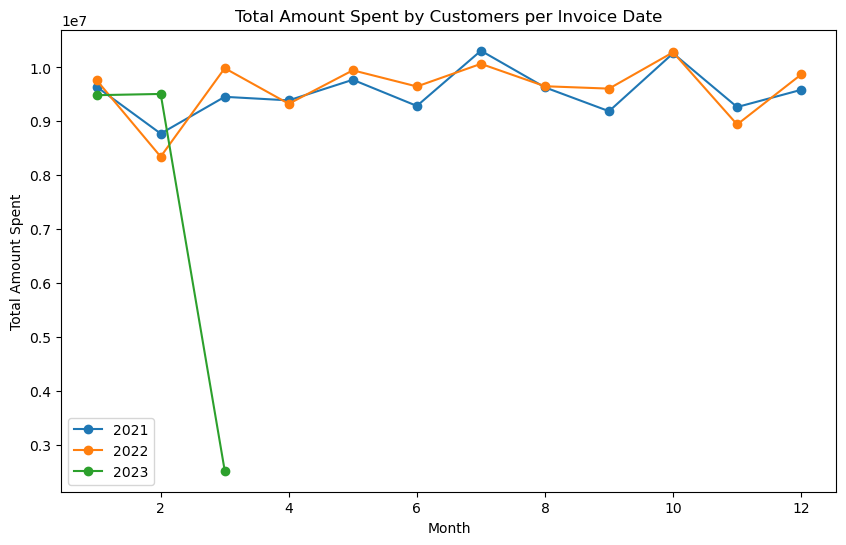

In [13]:
#3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
merged_df["invoice_date"] = pd.to_datetime(merged_df["invoice_date"], dayfirst = True)
merged_df["year"] = merged_df["invoice_date"].dt.year
merged_df["month"] = merged_df["invoice_date"].dt.month

new_sales_df = pd.DataFrame(merged_df.groupby(["year", "month"]).sum(numeric_only=True)["sales"])
new_sales_df.reset_index(inplace=True)
new_sales_df

plt.figure(figsize=(10, 6))


for yr in new_sales_df['year'].unique():
    plt.plot(new_sales_df[new_sales_df['year'] == yr]['month'], new_sales_df[new_sales_df['year'] ==yr]['sales'], marker='o', label = yr)
    plt.xlabel('Month')
    plt.ylabel('Total Amount Spent')
    plt.title('Total Amount Spent by Customers per Invoice Date')
    plt.legend()

plt.show()

In [15]:
#1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

def categorize_and_age_range(age):
    return f"{(age // 10) * 10}-{(age // 10) * 10 + 9}"

merged_df['Age Range'] = merged_df['age'].apply(categorize_and_age_range)

pd.pivot_table(merged_df, values='sales', index='category', columns='Age Range', aggfunc='sum', fill_value=0)

Age Range,10.0-19.0,20.0-29.0,30.0-39.0,40.0-49.0,50.0-59.0,60.0-69.0,70.0-79.0,80.0-89.0,nan-nan
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
